In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.model_selection import train_test_split


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
data = pd.read_csv('insurance.csv')
data.tail()

In [ ]:
# Convert categorical columns to numerical values
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
# Split data into features and labels
features = data.drop(columns='expenses')
labels = data['expenses']

In [ ]:
# Split into training and testing datasets (80-20 split)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
# Define the model
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


In [ ]:
# Set up a callback for early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop, tfdocs.modeling.EpochDots()]
)


9/9 - 0s - 6ms/step - loss: 3179.1980 - mae: 3179.1980
Testing set Mean Abs Error: 3179.20 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


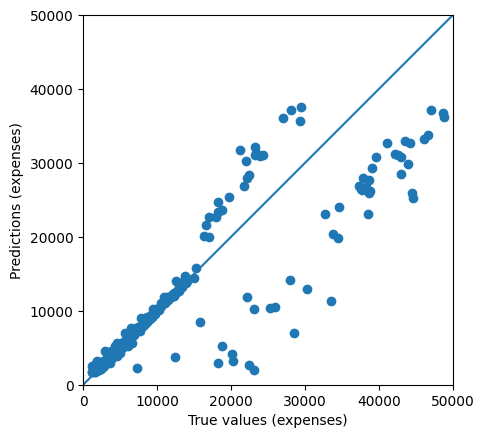

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae = model.evaluate(test_features, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
